In [1]:
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dtm

In [2]:
data_case=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
data_case

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,147985,148572,148933,149361,149810,149810,149810,150778,151013,151291
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,133146,133211,133310,133442,133591,133730,133912,133981,134201,134487
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,173922,175229,176724,178013,179216,180356,181376,182368,183347,184191
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,14747,14766,14797,14809,14836,14836,14836,14836,14873,14891
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,42970,43070,43158,43269,43487,43592,43662,43747,43890,43998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,157507,174461,181756,189066,193381,205656,215560,224894,232937,241543
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,317083,317264,317404,317534,317703,317703,317999,317999,318181,318435
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,7081,7086,7096,7104,7131,7131,7165,7187,7198,7213
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,196490,197123,197791,198455,199135,199662,200049,200201,200830,201342


In [3]:
data_death=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
data_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,6774,6804,6836,6864,6879,6879,6879,6936,6961,6978
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2457,2457,2457,2457,2458,2459,2459,2460,2460,2460
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4329,4370,4404,4441,4487,4520,4550,4578,4618,4654
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,128,128,128,128,128,128,128,128,129,129
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1018,1022,1026,1032,1042,1044,1049,1053,1057,1063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,1306,2071,2327,2720,3016,3250,3397,3757,4145,4487
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3609,3609,3609,3609,3611,3611,3613,3613,3615,3615
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1378,1380,1380,1383,1384,1384,1386,1389,1391,1392
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3412,3422,3430,3447,3459,3474,3484,3491,3499,3509


In [4]:
data_recover=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
data_recover

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,82586,82586,82586,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,130256,130291,130314,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,116770,117557,118409,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,14296,14348,14380,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,38360,39389,39582,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,43157,50831,54332,0,0,0,0,0,0,0
260,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,312149,312289,312320,0,0,0,0,0,0,0
261,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4212,4232,4251,0,0,0,0,0,0,0
262,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,188950,189341,189658,0,0,0,0,0,0,0


In [5]:
def covid_data_merge(df,tipe):
    if tipe=='case':
        cols=['cases_cum','cases_daily']
    elif tipe=='death':
        cols=['death_cum','death_daily']
    elif tipe=='recover':
        cols=['recover_cum','recover_daily']
    indo=df[df['Country/Region']=='Indonesia'].drop(['Province/State','Lat','Long'],axis=1)
    indo.set_index(indo['Country/Region'],inplace=True)
    indo=indo.drop('Country/Region',axis=1).transpose()
    indo.columns=[cols[0]]
    indo.columns.name='date'
    dates=[]
    for dt in indo.index:
        if len(dt.split('/')[0])==1:
            m='0{}'.format(dt.split('/')[0])
        else:
            m=dt.split('/')[0]

        if len(dt.split('/')[1])==1:
            d='0{}'.format(dt.split('/')[1])
        else:
            d=dt.split('/')[1]
        dates.append(dtm.datetime.strptime('{}/{}/20{}'.format(m,d,dt.split('/')[2]), '%m/%d/%Y'))
    indo.index=dates

    daily=indo.iloc[1:].reset_index()-indo.iloc[:-1].reset_index()
    indo[cols[1]]=0
    indo[cols[1]].iloc[1:]=daily[cols[0]].values
    return indo

In [6]:
cases=covid_data_merge(data_case,'case')
death=covid_data_merge(data_death,'death')
recover=covid_data_merge(data_recover,'recover')

In [149]:
data=pd.concat([cases,death,recover],axis=1)
#data=cases

In [139]:
data

date,cases_cum,cases_daily,death_cum,death_daily,recover_cum,recover_daily
2020-01-22,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-08-07,3639616,31753,105598,1588,0,0
2021-08-08,3666031,26415,107096,1498,0,0
2021-08-09,3686740,20709,108571,1475,0,0
2021-08-10,3718821,32081,110619,2048,0,0


<AxesSubplot:>

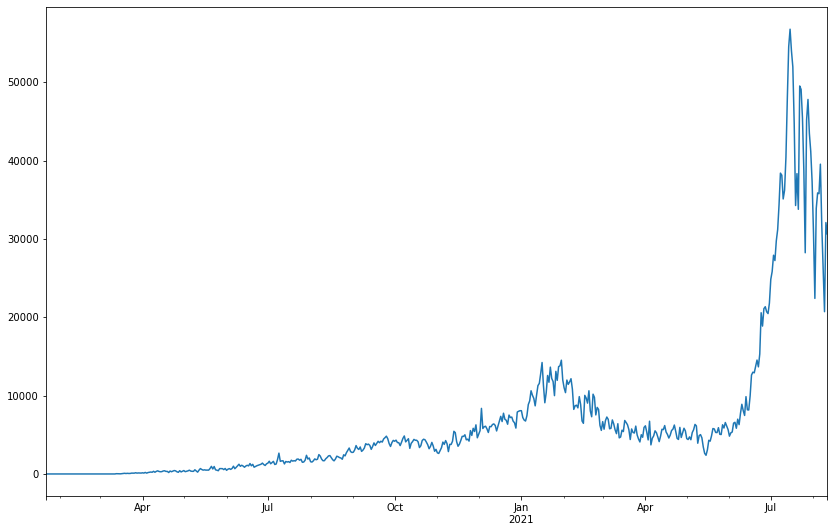

In [27]:
data.cases_daily.plot(kind='line')

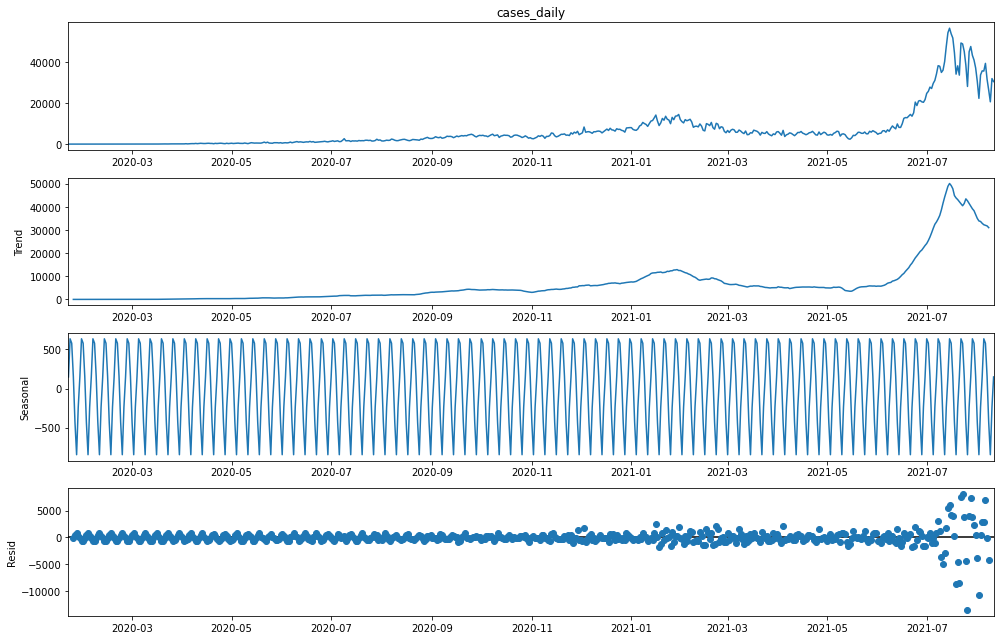

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pylab
pylab.rcParams['figure.figsize'] = (14, 9)
#We try to look at the data in yearly period, since the data are in monthly period, we aggregate it into 12 period
res = seasonal_decompose(data.cases_daily,model='additive', period=7)
ax=res.plot()
plt.show()

<AxesSubplot:>

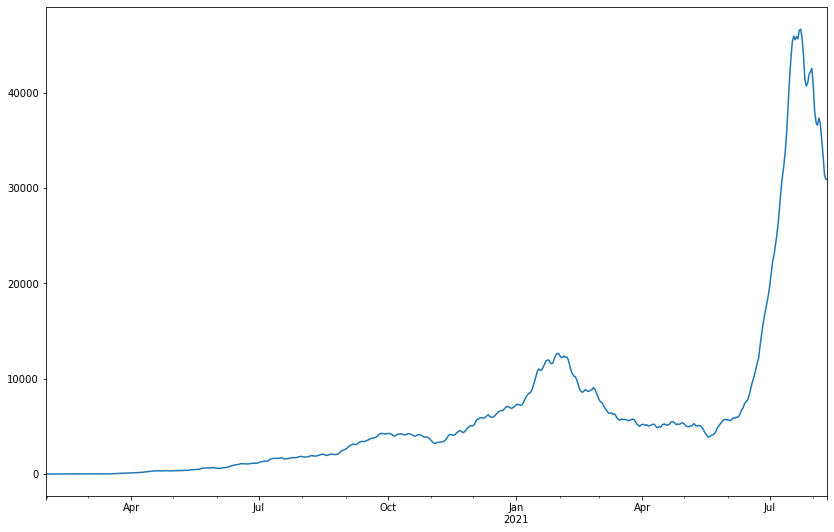

In [29]:
dat=data.cases_daily.rolling(window=10).mean().dropna()
dat.plot(kind='line')

In [20]:
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

def find_best_model(data,num_p,num_q):
    df=pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
    pq=[[],[]] #This list for storing the combinations of p and q
    aic=[] # This list for storing aic value
    for p in range(num_p+1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
        for q in range(num_q+1):
            if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
                try: #Using exception to avoid the error while training the model with certain p and q value
                    model=ARMA(data,order=(p,q))
                    result=model.fit()
                    pq[0].append(p)
                    pq[1].append(q)
                    aic.append(result.aic)
                except:
                    pass #If there is an error caused by the calculation, it will be skipped to the next iteration
    df['p']=pq[0]
    df['q']=pq[1]
    df['AIC']=aic
    
    df.sort_values('AIC',inplace=True)
    
    return df.p.iloc[0],df.q.iloc[0],df.AIC.iloc[0],df

p,q,AIC,df=find_best_model(dat,5,5)

/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, s

/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, s

/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, s

/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessia

/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, s

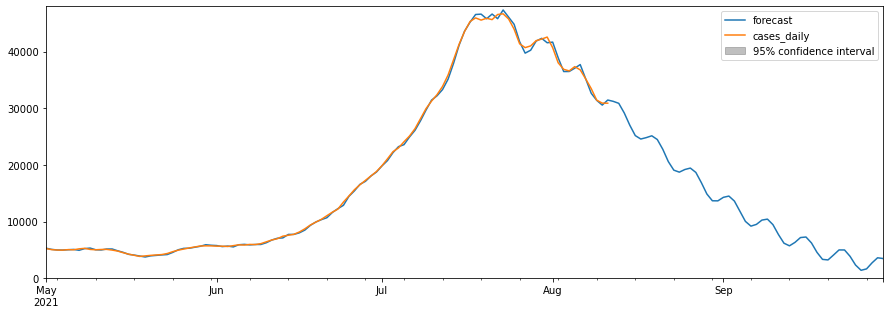

In [200]:
mod = ARMA(dat, order=(p,q)) #set MA_order to 1 for MA(1) model, another is 0
res = mod.fit()
fig,ax=plt.subplots(figsize=(15,5))
res.plot_predict(start=0, end=len(data)+60,ax=ax)
ax.set_xlim('2021-05-01','2021-09-30')
ax.set_ylim(0,48000)
plt.show()

# Forecasting using ML Supervised Model
## Univariate

In [43]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [32]:
data

date,cases_cum,cases_daily,death_cum,death_daily,recover_cum,recover_daily
2020-01-22,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0
...,...,...,...,...,...,...
2021-08-07,3639616,31753,105598,1588,0,0
2021-08-08,3666031,26415,107096,1498,0,0
2021-08-09,3686740,20709,108571,1475,0,0
2021-08-10,3718821,32081,110619,2048,0,0


In [232]:
#Forecasting data cased_daily berdasarkan 7 data histori (7 hari)

window=7
X=[]
y=[]
for i in range(window,len(data)):
    X.append(data.cases_daily.iloc[i-window:i].values)
    y.append(data.cases_daily.iloc[i])
X=np.array(X)
y=np.array(y)

In [233]:
X

array([[    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       ...,
       [22404, 33900, 35867, ..., 39532, 31753, 26415],
       [33900, 35867, 35764, ..., 31753, 26415, 20709],
       [35867, 35764, 39532, ..., 26415, 20709, 32081]])

In [234]:
dat_forecast=pd.DataFrame(X,index=data.index[:len(data)-window])
dat_forecast['y']=y
dat_forecast

,0,1,2,3,4,5,6,y
2020-01-22,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2021-07-31,37284,30738,22404,33900,35867,35764,39532,31753
2021-08-01,30738,22404,33900,35867,35764,39532,31753,26415
2021-08-02,22404,33900,35867,35764,39532,31753,26415,20709
2021-08-03,33900,35867,35764,39532,31753,26415,20709,32081


In [235]:
#MinMaxScaling

minmax=MinMaxScaler()
X_scaled=minmax.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.39473545, 0.59728315, 0.63193967, ..., 0.69651321, 0.55945522,
        0.46540515],
       [0.59728315, 0.63193967, 0.63012492, ..., 0.55945522, 0.46540515,
        0.36487129],
       [0.63193967, 0.63012492, 0.69651321, ..., 0.46540515, 0.36487129,
        0.56523424]])

In [236]:
train_size=int(0.7*len(X_scaled))

X_train=X_scaled[:train_size]
X_test=X_scaled[train_size:]

y_train=y[:train_size]
y_test=y[train_size:]

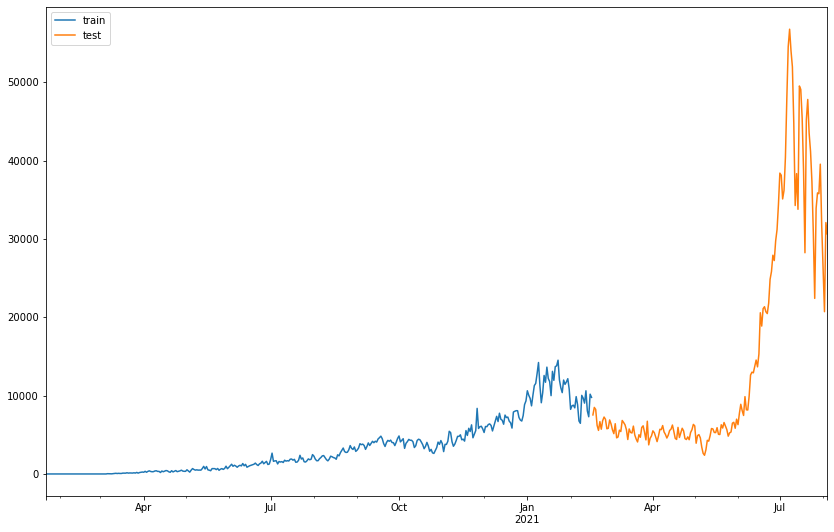

In [237]:
fig,ax=plt.subplots()
dat_forecast.y.iloc[:train_size].plot(kind='line',ax=ax,label='train')
dat_forecast.y.iloc[train_size:].plot(kind='line',ax=ax, label='test')
ax.legend()

### SVR

In [238]:

model=SVR(kernel='rbf',C=10000,gamma='auto')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
MAE=mean_absolute_error(y_test,y_pred)
print(MAE)

3990.257362614317


In [239]:
prediction=model.predict(X_scaled)
dat_forecast['pred']=prediction

<AxesSubplot:>

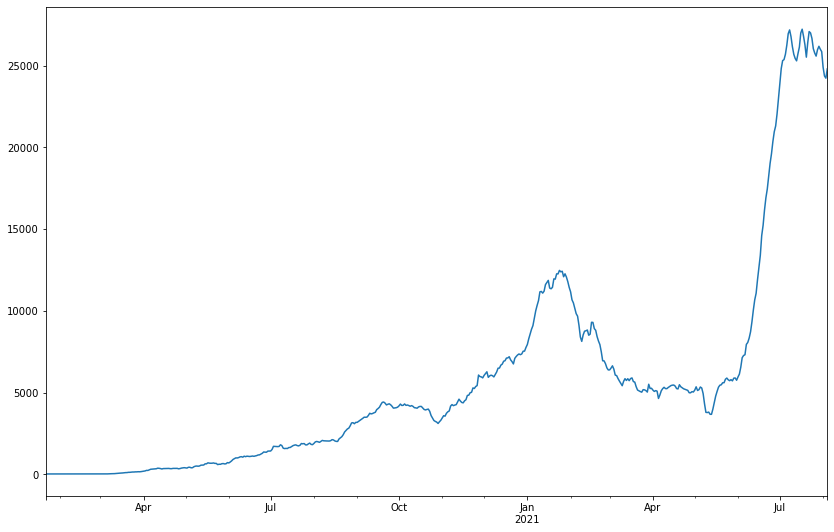

In [240]:
dat_forecast.pred.plot(kind='line')

### Linear Regression

1943.287647889325


<AxesSubplot:>

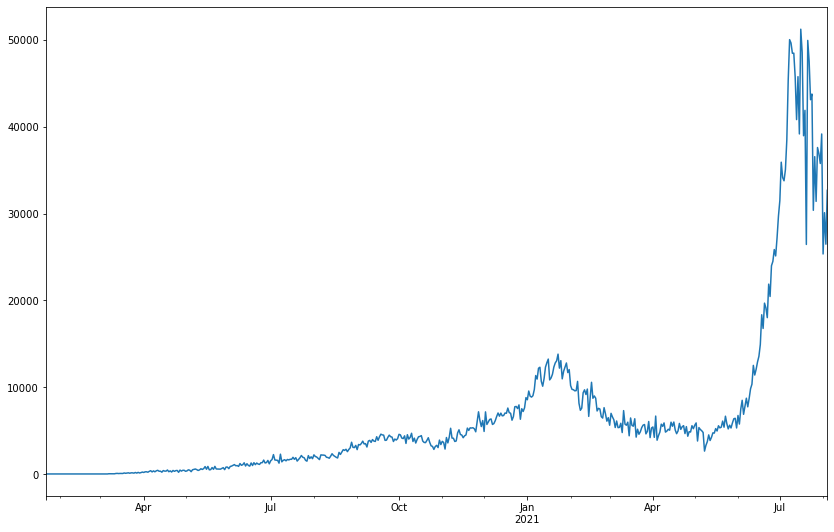

In [241]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
MAE=mean_absolute_error(y_test,y_pred)
print(MAE)

prediction=model.predict(X_scaled)
dat_forecast['pred']=prediction
dat_forecast.pred.plot(kind='line')

In [242]:
casedaily=data['cases_daily']
casedaily

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2021-08-07    31753
2021-08-08    26415
2021-08-09    20709
2021-08-10    32081
2021-08-11    30625
Name: cases_daily, Length: 568, dtype: int64

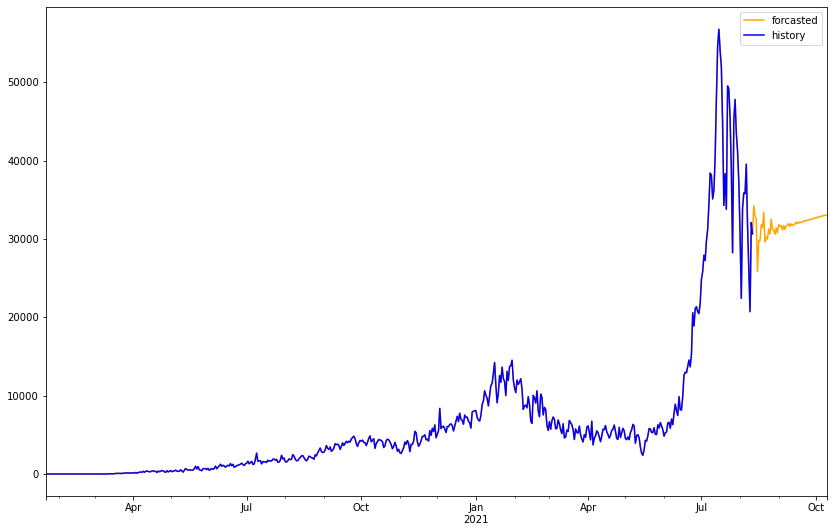

In [243]:
forecasting=pd.Series(casedaily.values,index=casedaily.index)
days=60
for i in range(days):
    hist=minmax.transform(forecasting[-window:].values.reshape(1, -1)) #single data
    y_for=model.predict(hist)[0]
    new_date=forecasting.index[-1]+dt.timedelta(days=1)
    forecasting.loc[new_date]=int(y_for)

fig,ax=plt.subplots()
forecasting.plot(kind='line',ax=ax,label='forcasted', color='orange')
casedaily.plot(kind='line',ax=ax,label='history',color='blue')
ax.legend()

Model exaust dalam forecasting data. Extract feature -> moving average

<AxesSubplot:>

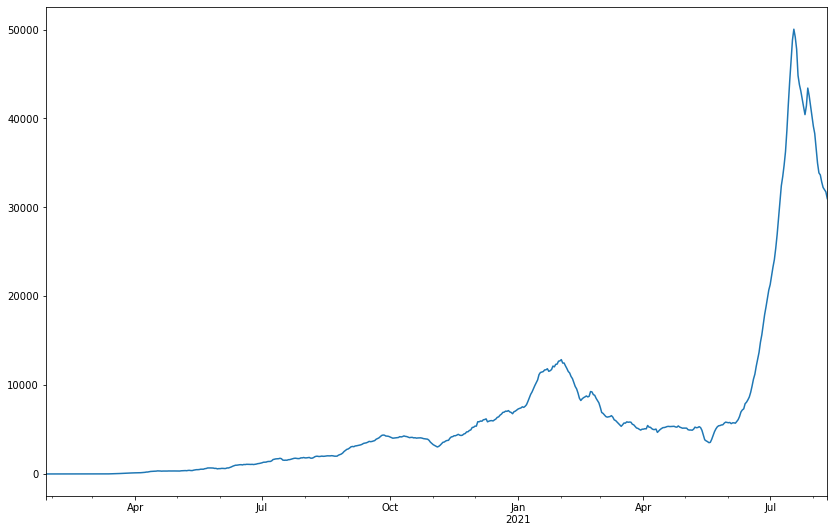

In [203]:
dat_ma=data.cases_daily.rolling(window=7).mean().dropna()
dat_ma.plot(kind='line')

In [252]:
from sklearn.linear_model import LinearRegression

def forecasting_process(data,percent_train,window,days):
    X=[]
    y=[]
    for i in range(window,len(data)):
        X.append(data.iloc[i-window:i].values)
        y.append(data.iloc[i])
    X=np.array(X)
    y=np.array(y)
    
    minmax=MinMaxScaler()
    X_scaled=minmax.fit_transform(X)
    
    train_size=int(percent_train*len(X_scaled))

    X_train=X_scaled[:train_size]
    X_test=X_scaled[train_size:]

    y_train=y[:train_size]
    y_test=y[train_size:]
    
    model=LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    MAE=mean_absolute_error(y_test,y_pred)
    print('MAE model:',MAE)
    
    forecasting=pd.Series(data.values,index=data.index)
    for i in range(days):
        hist=minmax.transform(forecasting[-window:].values.reshape(1, -1)) #single data
        y_for=model.predict(hist)[0]
        new_date=forecasting.index[-1]+dt.timedelta(days=1)
        forecasting.loc[new_date]=int(y_for)
    
    fig,ax=plt.subplots()
    forecasting.plot(kind='line',ax=ax,label='forcasted', color='orange')
    data.plot(kind='line',ax=ax,label='history',color='blue')
    ax.legend()

    return forecasting

MAE model: 232.05432223170374


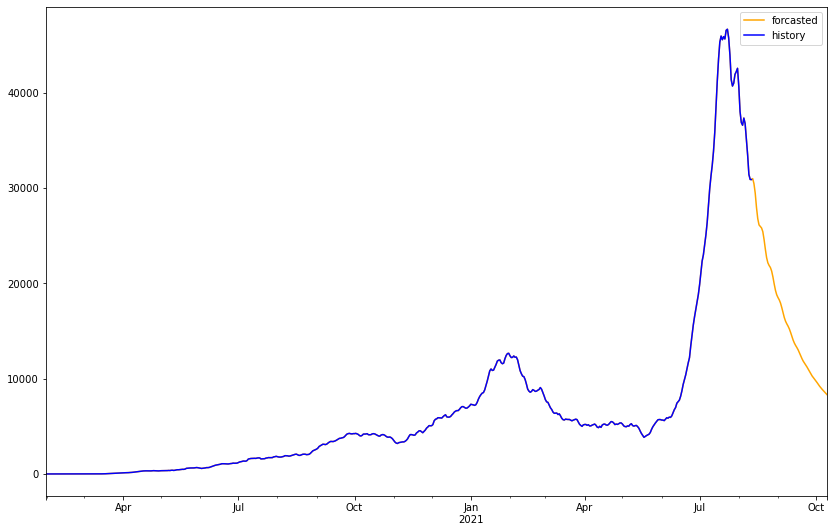

In [260]:
df_ma=data.cases_daily.rolling(window=10).mean().dropna()
df=forecasting_process(df_ma,0.7,7,60)